# Materi Praktikum 

### Pada praktikum ini, kita akan membahas:
##### Contoh 1: Membangun Rangkaian Kuantum
##### Contoh 2: Membangun Rangkaian Kuantum step by step
##### Contoh 3: Rangkaian dengan keadaan awal
##### Contoh 4: Konsep Superposisi
##### Contoh 5: Konsep Entanglement
##### Contoh 6: Konsep Interferensi

# CONTOH 1: Membangun Rangkaian Kuantum 
#### Langkah-langkah untuk membangun rangkaian kuantum menggunakan Qiskit
1. Memanggil Library yang Dibutuhkan
2. Membangun Rangkaian Kuantum (Quantum Circuit)
3. Menambahkan Gerbang Kuantum (Quantum Gates)
4. Menampilkan keadaan kuantum (Quantum State)
5. Mem-Visualisasikan keadaan kuantum dengan Bloch Sphere
6. Mengukur Seluruh Qubit (Measurement)
7. Menjalankan Rangkaian Kuantum di komputer lokal
8. Mengambil dan menampilkan hasil eksperimen di layar
9. Mem-Visualisasikan hasil eksperimen dengan Histogram                                  

### 1. Memanggil Library yang Dibutuhkan

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### 2. Membangun Rangkaian kuantum 3 qubit

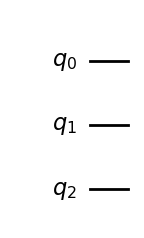

In [2]:
qc = QuantumCircuit(3)   # susunan qubit: q2 q1 q0
# Menggambar rangkaian di layar
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar


### 3. Menambahkan gerbang kuantum untuk mengubah-ubah keadaan qubit 

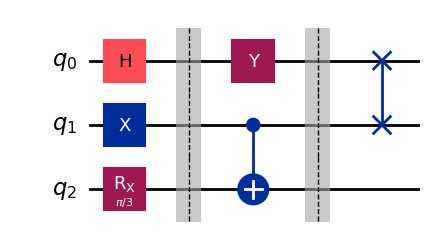

In [3]:
qc.h(0)           # menambahkan gerbang X pada qubit ke-0 (q0)
qc.x(1)           # menambahkan gerbang H pada qubit ke-1 (q1)
qc.rx(np.pi/3,2)  # Rotasi thd sb-x  pada q2, nilai parameter pi/3
qc.barrier()
qc.y(0)
qc.cx(1,2)
qc.barrier()
qc.swap(0,1)
# Menggambar rangkaian di layar
qc.draw('mpl')     # Tampilkan gambar sirkuit di layar

### 4. Menampilkan keadaan kuantum (Quantum State)

In [4]:
# menampilkan keadaan kuantum di layar 
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

Perhatikan bahwa: probabilitas untuk mendapatkan keadaan
- |001> = (-sqrt(2)/4)^2 = 1/8
- |011> = ( sqrt(2)/4)^2 = 1/8
- |101> = (-sqrt(6)/4)^2 = 3/8
- |111> = ( sqrt(6)/4)^2 = 3/8
- Jumlah probabilitas = 1/8 + 1/8 + 3/8 + 3/8 = 1

- Keadaan kuantum dalam bentuk vektor

In [5]:
# Dalam bentuk vektor 
array_to_latex(psi)


<IPython.core.display.Latex object>

### 5. Mem-Visualisasikan keadaan kuantum dengan Bloch Sphere

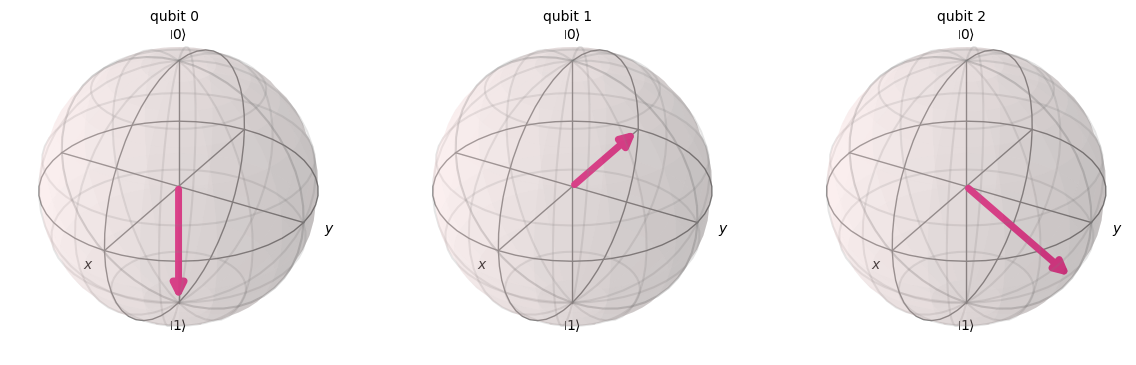

In [6]:
plot_bloch_multivector(psi)

### 6. Mengukur seluruh qubit

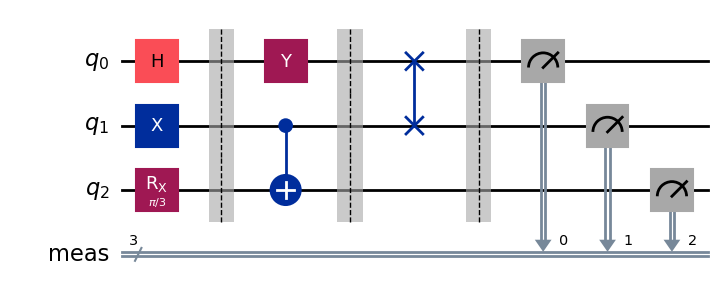

In [7]:
qc.measure_all()
# Menggambar rangkaian di layar
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

### 7.Menjalankan rangkaian Kuantum di komputer lokal

In [11]:
backend = AerSimulator()

# transpilasi rangkaian kuantum ke instruksi QASM tingkat rendah 
qc_compiled = transpile(qc, backend)

# Jalankan rangkaian pada simulator qasm. pengukuran dilakukan 100 kali
job = backend.run(qc_compiled, shots=100000)  

# Raih hasil dari pekerjaan tersebut
result = job.result()

### 8. Mengambil dan menampilkan hasil eksperimen di layar

In [12]:
count = result.get_counts()            # mengambil hasil pengukuran
print(count)                           # cetak di layar

{'101': 37606, '111': 37396, '011': 12509, '001': 12489}


Artinya: setelah dilakukan pengukuran
- keadaan qubit |111> runtuh menjadi bit klasik 111
- keadaan qubit |001> runtuh menjadi bit klasik 001
- keadaan qubit |101> runtuh menjadi bit klasik 101 
- keadaan qubit |011> runtuh menjadi bit klasik 011

### 9.Mem-Visualisasikan hasil eksperimen dengan Histogram

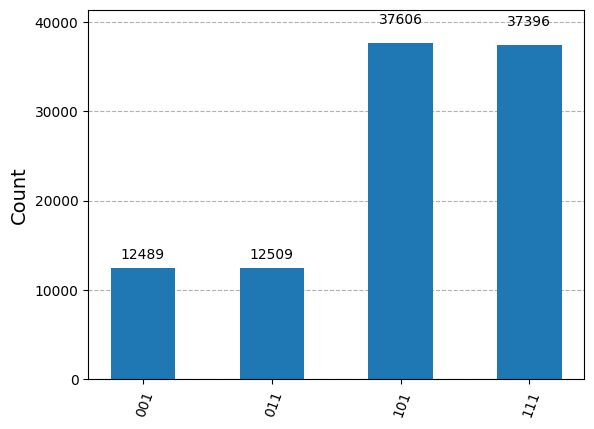

In [13]:
plot_histogram(count)

#### Histogram adalah grafik yang menampilkan frekuensi dari tiap-tiap keadaan

In [14]:
print('pengukuran dilakukan 100 kali')
print('secara teori keadaan |001> muncul 25 kali (1/4*100)') 
print('tetapi prakteknya keadaan |001> muncul', count['001'], 'kali') 

pengukuran dilakukan 100 kali
secara teori keadaan |001> muncul 25 kali (1/4*100)
tetapi prakteknya keadaan |001> muncul 12489 kali


#### CONTOH 2: Membangun Rangkaian Kuantum Step by Step

### 1. Memanggil Library yang Dibutuhkan

In [15]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### 2.Membangun Rangkaian Kuantum

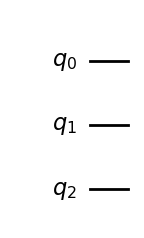

In [16]:
# Membangun Rangkaian Kuantum yang bekerja pada register kuantum tiga qubit
qc = QuantumCircuit(3)   # susunan qubit: q2 q1 q0
qc.draw('mpl')           # menampilkan gambar rangkaian di layar

In [17]:
# menampilkan keadaan awal di layar 
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

- Perhatikan bahwa, secara default keadaan awal kuantum |q2 q1 q0> =|000>

In [18]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

<IPython.core.display.Latex object>

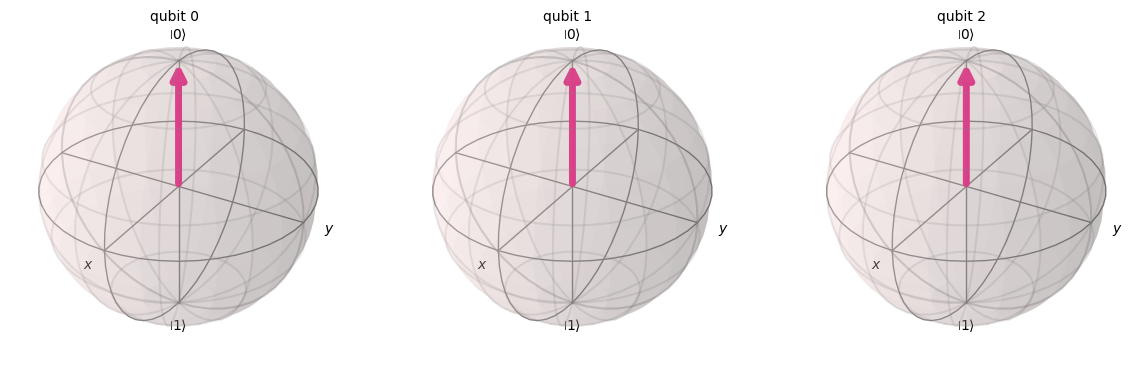

In [19]:
# Visualisasi keadaan qubit dalam bentuk Bola Bloch
plot_bloch_multivector(psi)

- Perhatikan bahwa qubit q0, q1, dan q2, semuanya mengarah ke atas

### 3. Menambahkan Gerbang Kuantum 

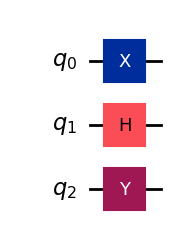

In [20]:
qc.x(0)           # menambahkan gerbang X pada qubit ke-0 (q0)
qc.h(1)           # menambahkan gerbang H pada qubit ke-1 (q1)
qc.y(2)           # menambahkan gerbang Y pada qubit ke-2 (q2)
qc.draw('mpl')    # menampilkan gambar rangkaian di layar

In [21]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

- Probabilitas mendapatkan keadaan kuantum |101> = [akar(2)/2]^2 = 1/2
- Probabilitas mendapatkan keadaan kuantum |111> = [akar(2)/2]^2 = 1/2
- Jumlah probabilitas seluruhnya = 1/2 + 1/2 = 1

In [22]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

<IPython.core.display.Latex object>

- Perhaikan bahwa, setelah menerapkan gerbang kuantum, Ada dua state, |101> dan |111>

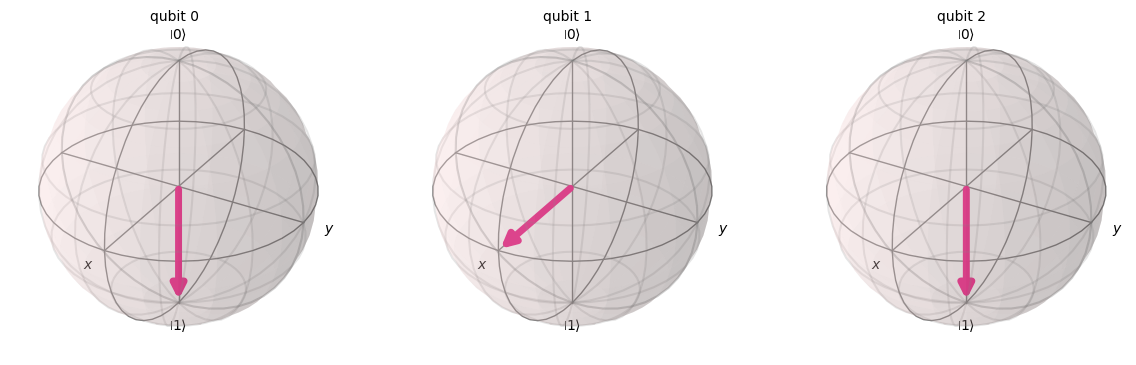

In [23]:
# menampilkan keadaan qubit dalam bentuk Bloch Sphere
plot_bloch_multivector(psi)

Perhatikan bahwa, 
- arah q0 kebawah karena memiliki kuantum state |1>, 
- arah q1 searah dengan sumbu-x,   psi = 1/sqrt(2) [|0> + |1>]
- q2 arahnya kebawah memiliki kuantum state |1>

### 4. Pengukuran Qubit (Measurement)

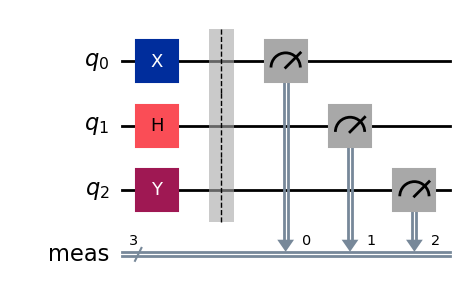

In [24]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

### 5. Menjalankan Sirkuit Kuantum di komputer lokal

In [25]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024) #pengukuran dilakukan 1024 kali
result = job.result()

### 6. Mendapatkan dan Menampilkan Hasil

In [26]:
count = result.get_counts()            # mengambil hasil pengukuran
print(count)                           # cetak di layar

{'101': 508, '111': 516}


# 7. Visualisasikan menggunakan Histogram

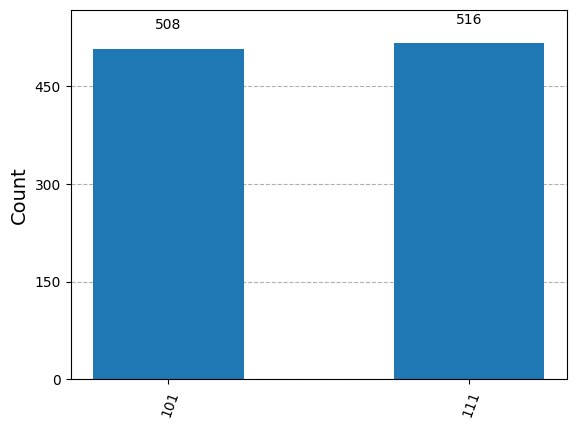

In [27]:
plot_histogram(count)

In [28]:
print('pengukuran dilakukan 1024 kali')
print('probabilitas mendapatkan keadaan |101> = 1/2, tetapi keadaan |101> muncul', count['101'], 'kali') 
print('probabilitas mendapatkan keadaan |111> = 1/2, tetapi keadaan |111>muncul', count['111'], 'kali') 

pengukuran dilakukan 1024 kali
probabilitas mendapatkan keadaan |101> = 1/2, tetapi keadaan |101> muncul 508 kali
probabilitas mendapatkan keadaan |111> = 1/2, tetapi keadaan |111>muncul 516 kali


# CONTOH 3: Rangkaian dengan keadaan awal 

## Inisialisasi sembarang <a name="initialization"/>
Bagaimana jika kita ingin menginisialisasi register qubit ke status sembarang? Status sembarang untuk $n$ qubit dapat ditentukan oleh vektor $2^n$ amplitudo, di mana jumlah kuadrat norma amplitudo sama dengan 1. Misalnya, status tiga qubit berikut dapat disiapkan:
$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$

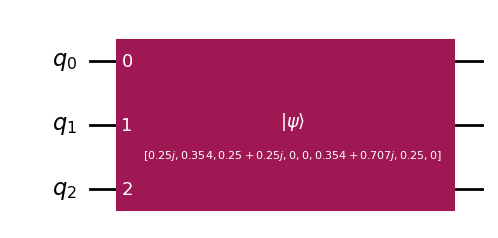

In [29]:
# Inisialisasi kuantum state 3-qubit 
import math
keadaan_awal = [
    1 / math.sqrt(16) * complex(0, 1),    # z = 0 + i
    1 / math.sqrt(8) * complex(1, 0),     # z = 1 + 0.i
    1 / math.sqrt(16) * complex(1, 1),    # z = 1 + i
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),     # z = 1 + 2i
    1 / math.sqrt(16) * complex(1, 0),    # z = 1 + 0.i
    0]

qc = QuantumCircuit(3)
qc.initialize(keadaan_awal, [0,1,2])  # keadaan awal diterapkan pada q0, q1, q2
qc.draw('mpl')

In [30]:
# menampilkan keadaan awal:
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

In [31]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

<IPython.core.display.Latex object>

##### penerapan berbagai gerbang kuantum

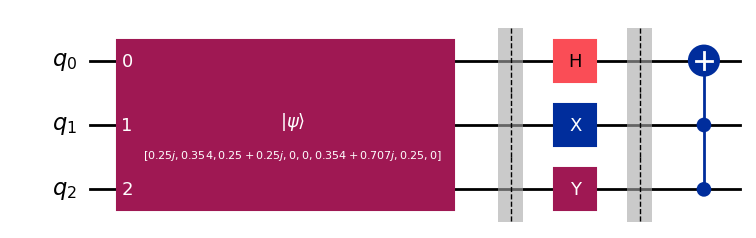

In [32]:
qc.barrier()
qc.h(0)
qc.x(1)
qc.y(2)
qc.barrier()
qc.ccx(2,1,0)
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [33]:
# menampilkan keadaan kuantum setelah berbagai gerbang diterapkan
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

In [34]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

<IPython.core.display.Latex object>

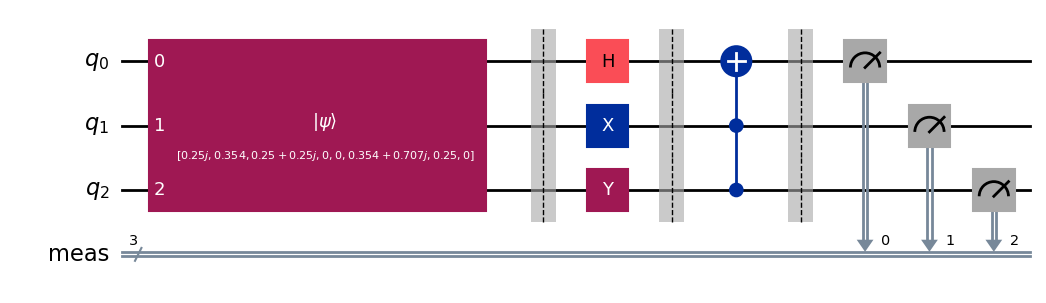

In [35]:
# Pengukuran seluruh qubit
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [36]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()

count = result.get_counts()            # mengambil hasil pengukuran
print(count)                           # cetak di layar

{'110': 90, '111': 99, '010': 339, '011': 304, '100': 73, '101': 63, '000': 27, '001': 29}


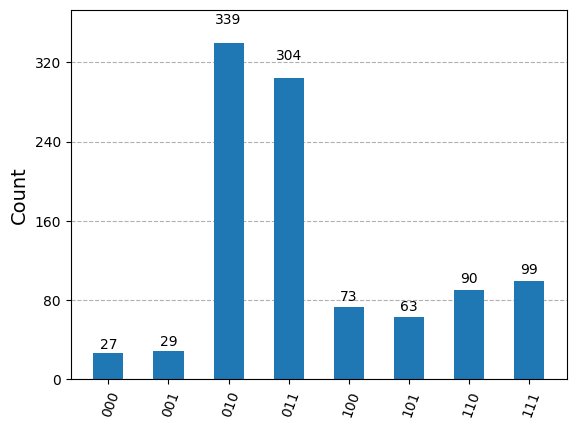

In [37]:
plot_histogram(count)

# CONTOH 4: Konsep Superposisi

In [ ]:
qc = QuantumCircuit(4)        # Buat rangkaian kuantum dengan 4 qubit: q3, q2, q1, q0
qc.h(0)                       # q0 mengalami superposisi
qc.draw('mpl')

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

- Perhatikan bahwa keadaan kuantum q3,q2,q1 = 000, sedangkan keadaan kuantum q0 = 0 dan 1 

# CONTOH 5: Konsep Entanglement

In [ ]:
qc = QuantumCircuit(2)        # Buat sirkuit kuantum dengan 4 qubit: q2, q1, q0
qc.h(0)
qc.cx(0,1)

qc.draw('mpl')  

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

###### Perhatikan suku pertama, bila q0 = 0 maka q1 = 0, dan suku kedua bila q0 = 1, maka q1 = 1

###### hal ini bisa juga terjadi dengan kondisi berikut:
- |00> + |11>
- |01> + |10>
- |00> - |11>
- |01> - |10>

# CONTOH 6: Konsep Interferensi

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [ ]:
# Inisialisasi kuantum state 3-qubit 
import math
keadaan_awal = [
    1 / math.sqrt(16) * complex(0, 1),    # z = 0 + i
    1 / math.sqrt(8) * complex(1, 0),     # z = 1 + 0.i
    1 / math.sqrt(16) * complex(1, 1),    # z = 1 + i
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),     # z = 1 + 2i
    1 / math.sqrt(16) * complex(1, 0),    # z = 1 + 0.i
    0]

qc = QuantumCircuit(3)                # buat rangkaian terdiri dari 3-qubit
qc.initialize(keadaan_awal, [0,1,2])  # keadaan awal diterapkan pada q0, q1, q2
qc.draw('mpl')

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

#### Perhatikan, pada keadaan awal, hanya ada 5 keadaan kuantum, yaitu: |000>, |001>,|010>,|101>,|110>
- amplitudo masing-masing keadaan kuantum adalah
- Amplitudo Keadaan kuantum |000> adalah i/4
- Amplitudo Keadaan kuantum |001> adalah akar(2)/4
- Amplitudo Keadaan kuantum |010> adalah (1+i)/4
- Amplitudo Keadaan kuantum |101> adalah [akar(2)/4 + akar(2)i/2]
- Amplitudo Keadaan kuantum |110> adalah 1/4

#### Sekarang berbagai gerbang diterapkan pada rangkaian

In [ ]:
qc.barrier()
qc.h(0)
qc.x(1)
qc.y(2)
qc.barrier()
qc.ccx(2,1,0)
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [ ]:
# menampilkan kuantum state (keadaan kuantum)
psi=Statevector(qc)
psi.draw('latex')

In [ ]:
#Cara alternatif untuk merepresentasikan dalam lateks
array_to_latex(psi)

In [ ]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar


In [ ]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
count = result.get_counts()            # mengambil hasil pengukuran
plot_histogram(count)

#### Setelah berbagai gerbang diterapkan, keadaan kuantumnya menjadi 8, 
- yaitu:|000>, |001>,|010>,|011>,|100>,|101>,|110>, dan |111>
- ini menandakan amplitudo dari qubit q0,q1, dan q2 saling berinterferensi  
- bisa juga diartikan, telah terjadi interferensi antar keadaan kuantum

- Keadaan kuantum |010> dan |011> mempunyai frekuensi terbesar, menandakan adanya interferensi konstruktif (saling menguatkan)